In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
!pip install statsmodels
import statsmodels.api as sm
from scipy.stats import norm
import math

#%load_ext lab_black

pd.set_option("max_columns", 500)

In [4]:
df = pd.read_csv("laco_nucleoids_per_fivemin.csv", delimiter=";")
df

,series_name,tif_file,cell_id,amount_of_nucleoids,bud_size
0,6,1,1,1,s
1,NaN,1,2,0,l
2,NaN,2,3,3,m
3,NaN,2,4,0,l
4,NaN,3,5,1,s
...,...,...,...,...,...
88,NaN,9,15,1,s
89,NaN,10,16,1,s
90,NaN,10,17,1,m
91,NaN,10,18,1,m


In [5]:
# Calculate the counts for entries 1, 2, 3, and 4 in 'number_of_nuc'
counts = df['amount_of_nucleoids'].value_counts()

# Calculate the percentages
all_cells = len(df)
percentages = counts / all_cells * 100

# Display the counts and percentages
print("Counts:")
print(counts)

print("\nPercentages:")
print(percentages)
print(all_cells)

Counts:
1    47
0    20
2    16
3     9
4     1
Name: amount_of_nucleoids, dtype: int64

Percentages:
1    50.537634
0    21.505376
2    17.204301
3     9.677419
4     1.075269
Name: amount_of_nucleoids, dtype: float64
93


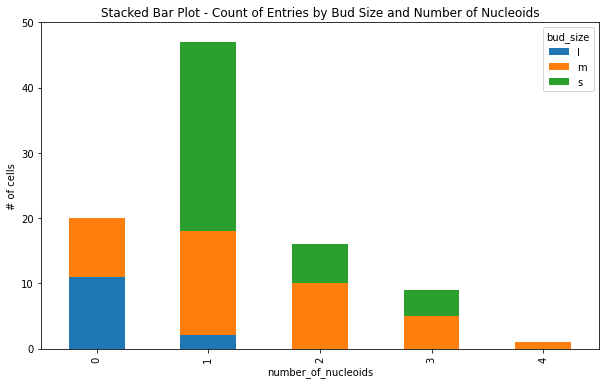

In [6]:
grouped_df = df.groupby(['bud_size', 'amount_of_nucleoids']).size().reset_index(name='count')

pivot_df = grouped_df.pivot(index='amount_of_nucleoids', columns='bud_size', values='count')

# Create the stacked bar plot
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6))

ax.set_xlabel('number_of_nucleoids')
ax.set_ylabel('# of cells')
ax.set_title('Stacked Bar Plot - Count of Entries by Bud Size and Number of Nucleoids')
plt.ylim(0,50)

plt.rcParams["svg.fonttype"] = "none"
plt.savefig('number_of_nucleoids_per_five_min.svg', transparent = True)

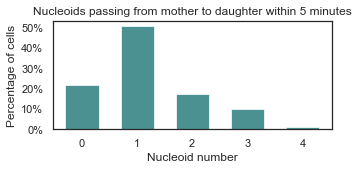

In [41]:
plt.figure(figsize=(5, 2))  # Adjust the width and height as needed

plt.bar(counts.index, percentages, width=0.6, align='center', alpha=0.7, color = '#006262')

# Set labels and title
plt.xlabel('Nucleoid number')
plt.ylabel('Percentage of cells')
plt.title('Nucleoids passing from mother to daughter within 5 minutes')

max_percent_rounded = math.ceil(max(percentages))
plt.yticks(np.arange(0, max_percent_rounded + 1, step=10)) 

# Set y-axis ticks to represent percentages
plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])

plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('nucleoids_passing_from_mother_to_daughter_hist_percentages.svg', transparent = True)

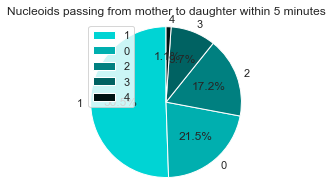

In [63]:
plt.figure(figsize=(3, 3))
plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%', startangle=90, colors=[  '#00D4D4', '#00AFAF', '#008080', '#006262', '#001414'])
plt.title('Nucleoids passing from mother to daughter within 5 minutes')
plt.axis('equal') 
plt.legend()
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('nucleoids_passing_from_mother_to_daughter_pie_percentages.svg', transparent = True)